# Project: Wrangling and Analyze Data


## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)


In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import requests
import json
import os
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
twitter_feed = pd.read_csv('twitter-archive-enhanced.csv', sep =',')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)


In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response.status_code

200

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [ ]:
# query the Twitter API for each tweet's JSON data using Python's Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [6]:
df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
fave_retweet_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

## Assessing Data

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


In [7]:
fave_retweet_data.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,7027,33877,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5305,29380,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3489,22099,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7239,36995,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7779,35372,Sat Jul 29 16:00:24 +0000 2017


In [8]:
fave_retweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


There are no missing entries in the `fave_retweet_data` dataset.


In [9]:
fave_retweet_data[fave_retweet_data.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,create_date


No duplicates in the `fave_retweet_data` dataset.


`create_date` column has object data type instead of datetime64


In [10]:
twitter_feed.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_feed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- The null values in the reply and retweet columns are not a problem since we don't need those columns anyway.
- There are 59 missing expanded urls. We'll need to test whether the missing expanded urls are a problem.
- `timestamp` column has object data type instead of datetime64


In [12]:
# checking for possible problems with expanded urls
expanded_url_problems = twitter_feed[twitter_feed['expanded_urls'].isnull()]
expanded_url_problems['text'].str.contains('http').sum()

0

This means there is no problem here. It is likely a case of the retweets or replies not having expanded URL. Every tweet in this dataset has an expanded URL.


In [13]:
twitter_feed.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_feed.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
twitter_feed.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
twitter_feed.rating_denominator.value_counts().sort_index(ascending=True)

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [17]:
twitter_feed.rating_denominator

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

The WeRateDogs handle is popular for having a different type of ratings scale. They usually use digits between 10-14 for their numerators, and 10 for the denominator. Numbers outside this scale may suggest a quality issue


In [18]:
# Checking for duplicates
twitter_feed[twitter_feed.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


No duplicates in the `twitter_feed` dataset. Now, we'll explore the dog stages.


In [19]:
# first group the dog stages into one
twitter_feed['collective_dog_stages'] = twitter_feed.doggo + twitter_feed.floofer + twitter_feed.pupper + twitter_feed.puppo

# then use value counts to determine if some entries have multiple dog stages (that is for one dog)
twitter_feed.collective_dog_stages.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: collective_dog_stages, dtype: int64

From the above, we can see that:
- There are 9 cases where one dog was given doggo and pupper.
- There is one case with doggo and puppo.
- There is one case with doggo and floofer.
- 1761 cases where the dog stage wasn't named.
- The dog stages should be in one column.

In [20]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are no missing values in all the columns.


In [22]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues

1. Some tweets are replies and retweets, not original tweets.

2. The source_column in `twitter_feed` has some unnecessary HTML code in it.

3. Incorrect rating numerators (decimal issues).

4. Wrong data types for the following columns: 
   - a. `timestamp` column in `twitter_feed` has object data type instead of datetime64.
   - b. `tweet_id` in all the datasets
   - c. `source` in `twitter_feed` - should be changed to category data type.


5.  Data about dogs and tweets are in the same dataset.

6. Multiple dog stages for some individual records.

7. `create_date` column in fave_retweet_data is not needed (after merge) - see below.

8. Incorrect Names in `dogs_df`.

9. Rows without images in `image_predictions` dataset.


### Tidiness issues

1. Dog stage is split into 4 columns in the `twitter_feed` dataset

2. The predictions, confidence and dog are split into multiple columns in the `image_predictions` dataset.

3. Merge datasets to create a master dataset.

## Cleaning Data

In this section, clean **all** of the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).


In [23]:
# Make copies of original pieces of data
twitter_feed_copy = twitter_feed.copy()
image_predictions_copy = image_predictions.copy()
fave_retweet_data_copy = fave_retweet_data.copy()
 

### Issue #1: Some tweets are replies and retweets, not original tweets


#### Define:

- Remove all the rows that have values in the `in_reply_to_status_id`, and `retweeted_status_id` columns.
- Remove the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and the `retweeted_status_timestamp` columns themselves.


#### Code


In [24]:
# dropping rows with values in the `in_reply_to_status_id`, and `retweeted_status_id` columns.

twitter_feed = twitter_feed[twitter_feed['in_reply_to_status_id'].isna() & twitter_feed['retweeted_status_id'].isna()]

In [25]:
# Dropping the columns
twitter_feed = twitter_feed.drop([
    'in_reply_to_status_id', 
    'in_reply_to_user_id', 
    'retweeted_status_id',  
    'retweeted_status_user_id', 
    'retweeted_status_timestamp'], 
    axis=1)

#### Test


In [26]:
twitter_feed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2097 non-null   int64 
 1   timestamp              2097 non-null   object
 2   source                 2097 non-null   object
 3   text                   2097 non-null   object
 4   expanded_urls          2094 non-null   object
 5   rating_numerator       2097 non-null   int64 
 6   rating_denominator     2097 non-null   int64 
 7   name                   2097 non-null   object
 8   doggo                  2097 non-null   object
 9   floofer                2097 non-null   object
 10  pupper                 2097 non-null   object
 11  puppo                  2097 non-null   object
 12  collective_dog_stages  2097 non-null   object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


### Issue #2: The source_column in `twitter_feed` has some unnecessary HTML code in it


#### Define:
- Use str.replace with some regex to remove the HTML code in `source` column

#### Code


In [27]:
twitter_feed['source'] = twitter_feed['source'].str.replace(r'<[^<>]*>', '', regex=True)

#### Test


In [28]:
twitter_feed.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #3: Incorrect rating numerators (decimal issues).


#### Define: 
Recall that in the `twitter_feed` dataset, it was observed that some of the figures in the ratings_numerator where possibly wrong, considering that they were out of the expected range. 
To fix this;
- Confirm that out of range rating numerators are errors.
- Correct identified errors.


#### Code


In [29]:
 # Confirm that out of range rating numerators are errors.
with pd.option_context('max_colwidth', 200):
    display(twitter_feed[twitter_feed['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/var/folders/z6/d4q6vc_17x3_j2vwdk7jf2040000gn/T/ipykernel_50253/836077609.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_feed[twitter_feed['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


Above, for 4 tweets, there are ratings with decimals in them, and the corresponding rating_numerator are incorrect. First, the data type for rating_numerator and rating_denominator will be changed to floats, and then the incorrect values will be updated.

In [30]:
# Change datatype for rating_numerator and rating_denominator columns to float
twitter_feed[['rating_numerator', 'rating_denominator']] = twitter_feed[['rating_numerator','rating_denominator']].astype(float)

# Correct identified errors: Bella's rating_numerator should be 13.5, not 5
twitter_feed.loc[(twitter_feed.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5

# Correct identified errors: Logan's rating_numerator should be 9.75, not 75
twitter_feed.loc[(twitter_feed.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75

# Correct identified errors: Bella's rating_numerator should be 11.27, not 27
twitter_feed.loc[(twitter_feed.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27

# Correct identified errors: Bella's rating_numerator should be 11.26, not 26
twitter_feed.loc[(twitter_feed.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


In [31]:
twitter_feed[['rating_numerator']].describe()

,rating_numerator
count,2097.000000
mean,12.147725
std,40.338978
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


The above describe block shows that there is still a rating numerator with 1776, which may be an error

In [32]:
 # Confirm that out of range rating numerators are errors.
with pd.option_context('max_colwidth', 200):
    display(twitter_feed[twitter_feed['rating_numerator'] == 1776]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0


The tweet with id `749981277374128128` shows that the rating numerator of 1776 is correct and not an error.

#### Test


In [33]:
with pd.option_context('max_colwidth', 200):
    display(twitter_feed[twitter_feed['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/var/folders/z6/d4q6vc_17x3_j2vwdk7jf2040000gn/T/ipykernel_50253/598405080.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_feed[twitter_feed['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Issue #4: Wrong data types for some columns:


#### Define:
- Change data type of variables in the `timestamp` column to datetime64.
- Change `tweet_id` in all the datasets to string type.
- `source` in `twitter_feed` - to be changed to category data type.

#### Code

In [34]:
# `timestamp` column to datetime64
twitter_feed['timestamp'] = pd.to_datetime(twitter_feed['timestamp'])

# Change `tweet_id` in all the datasets to string type.
twitter_feed.tweet_id = twitter_feed.tweet_id.astype(str)
image_predictions.tweet_id = image_predictions.tweet_id.astype(str)
fave_retweet_data.tweet_id = fave_retweet_data.tweet_id.astype(str)

# `source`  in `twitter_feed` - to be changed to category data type.
twitter_feed.source = twitter_feed.source.astype("category")

#### Test

In [35]:
twitter_feed.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,collective_dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NoneNoneNoneNone


### Issue #5: Data about dogs and tweets are in the same dataset. Split to simplify cleaning


#### Define: 
- Create a new dataset for dogs by copying out the relevant dog columns i.e; `tweet_id`, `name`, `doggo`, `floofer`, `pupper`, `puppo`, `rating_numerator`, `rating_denominator`.
- Drop dog specific columns i.e; `name`, `doggo`, `floofer`, `pupper`, `puppo`, `rating_numerator`, `rating_denominator`.


#### Code


In [36]:
twitter_feed.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'collective_dog_stages'],
      dtype='object')

In [37]:

dogs_df= twitter_feed[['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator', 'collective_dog_stages']].copy()
tweets_df = twitter_feed.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator', 'collective_dog_stages'], axis=1)

#### Test


In [38]:
tweets_df.head()

,tweet_id,timestamp,source,text,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...


In [39]:
tweets_df.shape

(2097, 5)

In [40]:
dogs_df.shape

(2097, 9)

In [41]:
dogs_df.head()

,tweet_id,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,collective_dog_stages
0,892420643555336193,Phineas,None,None,None,None,13.0,10.0,NoneNoneNoneNone
1,892177421306343426,Tilly,None,None,None,None,13.0,10.0,NoneNoneNoneNone
2,891815181378084864,Archie,None,None,None,None,12.0,10.0,NoneNoneNoneNone
3,891689557279858688,Darla,None,None,None,None,13.0,10.0,NoneNoneNoneNone
4,891327558926688256,Franklin,None,None,None,None,12.0,10.0,NoneNoneNoneNone


### Issue #6: Multiple dog stages for some dogs.

#### Define: 
- There are 12 cases where one dog was given doggo and pupper.
- There is one case with doggo and puppo.
- There is one case with doggo and floofer.
- 1761 cases where the dog stage wasn't named.


To do:
- Create a new column for that identifies unknown and multiple dog stages, as well as the correct ones.

#### Code:

In [42]:
# reminding myself what the dog_stages combination is like currently.
dogs_df.collective_dog_stages.value_counts()

NoneNoneNoneNone        1761
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: collective_dog_stages, dtype: int64

In [43]:
dogs_df.columns

Index(['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating_numerator', 'rating_denominator', 'collective_dog_stages'],
      dtype='object')

In [44]:
# defining the conditions 
condition = [
    (dogs_df ['doggo'] == 'doggo') & (dogs_df ['floofer'] == 'None') & (dogs_df ['pupper'] == 'pupper') & (dogs_df ['puppo'] == 'None'), # multiple
    (dogs_df ['doggo'] == 'doggo') & (dogs_df ['floofer'] == 'None') & (dogs_df ['pupper'] == 'None') & (dogs_df ['puppo'] == 'puppo'), # multiple
    (dogs_df ['doggo'] == 'doggo') & (dogs_df ['floofer'] == 'floofer') & (dogs_df ['pupper'] == 'None') & (dogs_df ['puppo'] == 'None'), # multiple
    (dogs_df ['doggo'] == 'None') & (dogs_df ['floofer'] == 'None') & (dogs_df ['pupper'] == 'None') & (dogs_df ['puppo'] == 'None'), # unknown
    (dogs_df['collective_dog_stages'] == 'doggoNoneNoneNone'), # doggo
    (dogs_df['collective_dog_stages'] == 'NoneflooferNoneNone'), # floofer
    (dogs_df['collective_dog_stages'] == 'NoneNonepupperNone'), # pupper
    (dogs_df['collective_dog_stages'] == 'NoneNoneNonepuppo') # puppo
    ]

# defining the value for when condition is true
value = ['multiple', 'multiple', 'multiple', 'unknown', 'doggo', 'floofer', 'pupper', 'puppo']

# creating a new column with np.elect using the defined condition and value
dogs_df['dog_stages'] = np.select(condition, value)

#### Test

In [45]:
dogs_df.dog_stages.value_counts()

unknown     1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stages, dtype: int64

### Issue #7: Four different dog stages in 4 columns


#### Define: There are 4 different dog stages on seperate columns; doggo, floofer, pupper, puppo. 
- Drop the columns since they have been merged into the `dog_stages` column.
- Drop `collective_stages` column, it has served its purpose.

#### Code


In [46]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   object 
 1   name                   2097 non-null   object 
 2   doggo                  2097 non-null   object 
 3   floofer                2097 non-null   object 
 4   pupper                 2097 non-null   object 
 5   puppo                  2097 non-null   object 
 6   rating_numerator       2097 non-null   float64
 7   rating_denominator     2097 non-null   float64
 8   collective_dog_stages  2097 non-null   object 
 9   dog_stages             2097 non-null   object 
dtypes: float64(2), object(8)
memory usage: 180.2+ KB


In [47]:
dogs_df = dogs_df.drop(['doggo', 'floofer', 'pupper', 'puppo', 'collective_dog_stages'], axis=1)

#### Test

In [48]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   object 
 1   name                2097 non-null   object 
 2   rating_numerator    2097 non-null   float64
 3   rating_denominator  2097 non-null   float64
 4   dog_stages          2097 non-null   object 
dtypes: float64(2), object(3)
memory usage: 98.3+ KB


In [49]:
dogs_df.head()

,tweet_id,name,rating_numerator,rating_denominator,dog_stages
0,892420643555336193,Phineas,13.0,10.0,unknown
1,892177421306343426,Tilly,13.0,10.0,unknown
2,891815181378084864,Archie,12.0,10.0,unknown
3,891689557279858688,Darla,13.0,10.0,unknown
4,891327558926688256,Franklin,12.0,10.0,unknown


In [50]:
dogs_df.dog_stages.value_counts()

unknown     1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stages, dtype: int64

### Issue #8: Rows without images in `image_predictions` dataset.


#### Define:
- Drop rows in `image_predictions` without images.



#### Code


In [51]:
# drop rows with in `image_predictions` no image
image_predictions.dropna(axis = 0, inplace=True)

#### Test


In [52]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9: The predictions, confidence and dog are split into multiple columns.


#### Define:
- Collapse the `p1`, `p2`, and `p3` columns into prediction round.
- Organize the values in `p1`, `p2`, and `p3` into a single column `breed_predictions`.
- Collapse the `p1_conf`, `p2_conf`, and `p3_conf` into a single column `confidence`.
- Melt the `p1_dog`, `p2_dog`, and `p3_dog` into column `dog`.



#### Code


In [53]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [54]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [55]:
# Collapse the `p1`, `p2`, and `p3` columns into prediction round.
image_predictions = pd.melt(image_predictions,
    id_vars= ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
    value_vars= ['p1', 'p2', 'p3'],
    var_name= 'prediction_round',
    value_name= 'breed_predictions' #Organize the values in `p1`, `p2`, and `p3` into a single column `breed_predictions`.

)

In [56]:
# Collapse the `p1_conf`, `p2_conf`, and `p3_conf` into a single column `confidence`.
image_predictions = pd.melt(image_predictions,
    id_vars= ['tweet_id', 'jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog', 'prediction_round', 'breed_predictions'],
    value_vars= ['p1_conf', 'p2_conf', 'p3_conf'],
    var_name= 'confidencesssssss',
    value_name= 'confidence'
)

In [57]:
# remove newly created duplicated rows
image_predictions = image_predictions[image_predictions['prediction_round'] == image_predictions['confidencesssssss'].str[:2]]

In [58]:
# remove confidencesssssss column
image_predictions = image_predictions.drop('confidencesssssss', axis=1)

In [59]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog',
       'prediction_round', 'breed_predictions', 'confidence'],
      dtype='object')

In [60]:
# Melt the `p1_dog`, `p2_dog`, and `p3_dog` into column `dog`.
image_predictions = pd.melt(image_predictions,
    id_vars= ['tweet_id', 'jpg_url', 'img_num', 'prediction_round', 'breed_predictions', 'confidence'],
    value_vars= ['p1_dog', 'p2_dog', 'p3_dog'],
    var_name= 'confidencesssssss',
    value_name= 'dog'

)

In [61]:
# remove newly created duplicated rows
image_predictions = image_predictions[image_predictions['prediction_round'] == image_predictions['confidencesssssss'].str[:2]]
# remove confidencesssssss column
image_predictions = image_predictions.drop('confidencesssssss', axis=1)

In [62]:
# remove the p in the prediction round column
image_predictions['prediction_round'] = image_predictions['prediction_round'].str[1]

In [63]:
# `timestamp` column to datetime64
twitter_feed['timestamp'] = pd.to_datetime(twitter_feed['timestamp'])

# Change `tweet_id` in all the datasets to string type.
twitter_feed.tweet_id = twitter_feed.tweet_id.astype(str)
image_predictions.tweet_id = image_predictions.tweet_id.astype(str)
fave_retweet_data.tweet_id = fave_retweet_data.tweet_id.astype(str)

# `source`  in `twitter_feed` - to be changed to category data type.
twitter_feed.source = twitter_feed.source.astype("category")

#### Test


In [64]:
print('Shape: ', image_predictions.shape)
print('Head: ', image_predictions.head())

Shape:  (6225, 7)
Head:               tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num prediction_round       breed_predictions  confidence   dog  
0        1                1  Welsh_springer_spaniel    0.465074  True  
1        1                1                 redbone    0.506826  True  
2        1                1         German_shepherd    0.596461  True  
3        1                1     Rhodesian_ridgeback    0.408143  True  
4        1                1      miniature_pinscher    0.560311  True  


### Issue #10: `create_date` column in fave_retweet_data is not needed (after merge).


#### Define:

- Merge `tweets_df` with `fave_retweet_data`.
- Delete `create_date` column.


#### Code


In [65]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2097 non-null   object             
 1   timestamp      2097 non-null   datetime64[ns, UTC]
 2   source         2097 non-null   category           
 3   text           2097 non-null   object             
 4   expanded_urls  2094 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), object(3)
memory usage: 84.2+ KB


In [66]:
fave_retweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [67]:
fave_retweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [68]:
tweets_df = tweets_df.merge(right= fave_retweet_data, how='left', on='tweet_id')

In [69]:
tweets_df = tweets_df.drop(['create_date'], axis=1)

#### Test


In [70]:
tweets_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,7027.0,33877.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5305.0,29380.0


### Issue #11: Incorrect Names  in `dogs_df`.


#### Define:
- Confirm the incorrect names.
- Correct incorrect names.


#### Code


In [71]:
dogs_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [72]:
dogs_df['name'][dogs_df['name'].str.match('[a-z]+')] = 'None'

/var/folders/z6/d4q6vc_17x3_j2vwdk7jf2040000gn/T/ipykernel_50253/1970436276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['name'][dogs_df['name'].str.match('[a-z]+')] = 'None'


#### Test


In [73]:
dogs_df.name.value_counts()

None          707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

It appears as though 707 of the dogs were wrongly named.

### Issue #12: Create a master dataset.


#### Define:
- Save `dogs_df`, `tweets_df`, and `image_predictions` to csv.
- Merge all three to one master dataset, save to csv as well.
- Delete nulls.


#### Code


In [74]:
print(dogs_df.loc[(dogs_df.tweet_id == 666020888022790149)])

Empty DataFrame
Columns: [tweet_id, name, rating_numerator, rating_denominator, dog_stages]
Index: []


In [75]:
print(tweets_df.loc[(tweets_df.tweet_id == 666020888022790149)])
# 666020888022790149

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, retweet_count, favorite_count]
Index: []


In [76]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 18674
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           6225 non-null   object 
 1   jpg_url            6225 non-null   object 
 2   img_num            6225 non-null   int64  
 3   prediction_round   6225 non-null   object 
 4   breed_predictions  6225 non-null   object 
 5   confidence         6225 non-null   float64
 6   dog                6225 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 346.5+ KB


In [77]:
dogs_df.to_csv('dogs.csv', sep=',', index=False)
tweets_df.to_csv('tweets.csv', sep=',', index=False)
image_predictions.to_csv('image_predictions.csv', sep=',', index=False)

In [78]:
master_archive = pd.merge(left=dogs_df, right=tweets_df, how='left', on='tweet_id')

In [79]:
master_archive.dropna(axis = 0, inplace=True)

#### Test


In [80]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   name                2086 non-null   object             
 2   rating_numerator    2086 non-null   float64            
 3   rating_denominator  2086 non-null   float64            
 4   dog_stages          2086 non-null   object             
 5   timestamp           2086 non-null   datetime64[ns, UTC]
 6   source              2086 non-null   category           
 7   text                2086 non-null   object             
 8   expanded_urls       2086 non-null   object             
 9   retweet_count       2086 non-null   float64            
 10  favorite_count      2086 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 181.5+ KB


## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".


In [81]:
master_archive.to_csv('twitter_archive_master.csv', sep=',', index=False)

## Analyzing and Visualizing Data

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**


In [82]:
# Reading the master data set
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
# Overview...
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2086 non-null   int64  
 1   name                2086 non-null   object 
 2   rating_numerator    2086 non-null   float64
 3   rating_denominator  2086 non-null   float64
 4   dog_stages          2086 non-null   object 
 5   timestamp           2086 non-null   object 
 6   source              2086 non-null   object 
 7   text                2086 non-null   object 
 8   expanded_urls       2086 non-null   object 
 9   retweet_count       2086 non-null   float64
 10  favorite_count      2086 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 179.4+ KB


From the above, it can be seen that datatype has changed for some columns since the conversion to csv and reading into pd. We'll just adjust the data types next.

In [83]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stages = twitter_archive_master.dog_stages.astype("category")
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count']] = twitter_archive_master[['retweet_count', 'favorite_count']].astype(int)
# twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [84]:
# Confirming that the changes have been effected
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   name                2086 non-null   object             
 2   rating_numerator    2086 non-null   float64            
 3   rating_denominator  2086 non-null   float64            
 4   dog_stages          2086 non-null   category           
 5   timestamp           2086 non-null   datetime64[ns, UTC]
 6   source              2086 non-null   object             
 7   text                2086 non-null   object             
 8   expanded_urls       2086 non-null   object             
 9   retweet_count       2086 non-null   int64              
 10  favorite_count      2086 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 165.3+ KB

#### Most Used Twitter Source

In [85]:
#calculate the frequency of each twitter source
twitter_source = twitter_archive_master['source'].value_counts().sort_values()
twitter_source

TweetDeck                10
Twitter Web Client       30
Vine - Make a Scene      91
Twitter for iPhone     1955
Name: source, dtype: int64

In [86]:
# Setting the order for seaborn
source_order = twitter_source.index
source_order

Index(['TweetDeck', 'Twitter Web Client', 'Vine - Make a Scene',
       'Twitter for iPhone'],
      dtype='object')

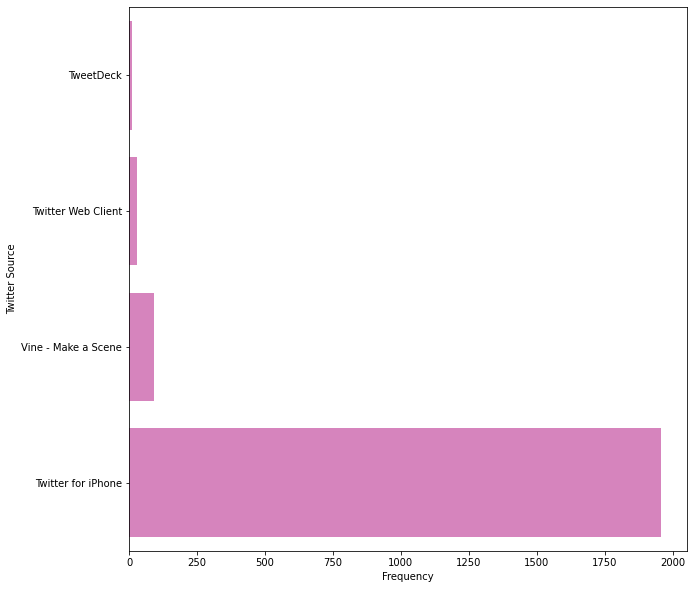

In [96]:
base_color = sns.color_palette()[6]
plt.figure(figsize = [10, 10])
sns.countplot(data=twitter_archive_master, y='source', color=base_color, order=source_order)
plt.xlabel('Frequency')
plt.ylabel('Twitter Source')
plt.savefig('Twitter-source-frequency.png') # save figure

Twitter for iphone was the most used twitter source.

#### Descriptive Statistics for Integer Columns

In [88]:
twitter_archive_master[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,2086.000000,2086.000000,2086.000000
mean,12.150422,2312.149089,7798.439597
std,40.445120,4051.035606,11356.021492
min,0.000000,11.000000,66.000000
25%,10.000000,513.250000,1715.750000
50%,11.000000,1117.000000,3539.000000
75%,12.000000,2632.500000,9722.250000
max,1776.000000,70922.000000,145123.000000


Here we can see that most of 75% of the rating numerators were 12. 50% of the tweets got 1117 retweets, and 3539 favorite counts

Recall that tweet with ID `749981277374128128` has the dog that was rated 1776. This singular case may affect the way that `.describe()` calculates its results; this tweet is an outlier. We can explore the tweets with `rating_numerators` greater than 12 ( and possible out liers) by looking at the distribution in box plot

In [89]:
for_describe_df = twitter_archive_master.copy()

In [90]:
for_describe_df = for_describe_df.drop(labels=[761], axis=0)

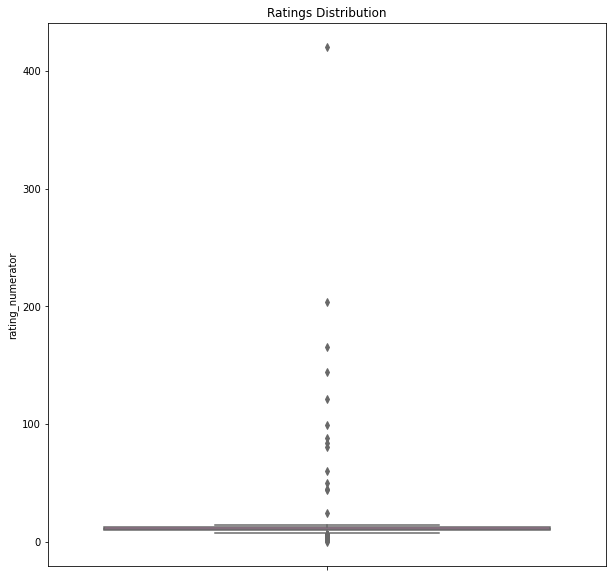

In [91]:
plt.figure(figsize = [10, 10])
ax1 = sns.boxplot(data=for_describe_df, y='rating_numerator', color=base_color)
plt.title('Ratings Distribution')
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim())
plt.savefig('ratings-distribution.png') # save figure


#### Most popular dog name

In [92]:
popular_dog_name = twitter_archive_master.name.value_counts()[1:10] #.rename_axis('name').reset_index(name='Frequency')
popular_dog_name

Cooper     10
Oliver     10
Charlie    10
Lucy       10
Penny       9
Tucker      9
Sadie       8
Winston     8
Lola        8
Name: name, dtype: int64

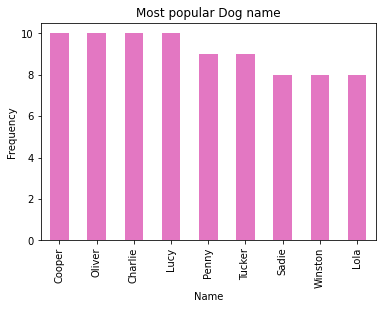

In [93]:
popular_dog_name.plot.bar(color = base_color)
plt.title('Most popular Dog name')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.savefig('mpdname.png') # save figure

Cooper, Oliver, Charlie, Lucy, Penny, Tucker, Sardie, Winston and Lola are the 10 most popular dog names in this dataset

#### Correlation between retweets and favorite

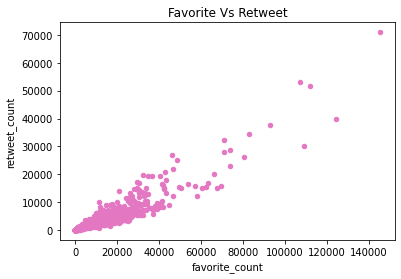

In [94]:
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite Vs Retweet', color=base_color)
plt.savefig('Favorite-vs-retweet.png') # save figure

In [95]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.925941667445189

From the graph, there is a positive relationship between `favorite_count` and `retweet_count`. This relationship is depicted by the correlation value of `0.92`, which suggests a strong positive relationship. This means that when a tweet has a high `retweet_count`, they are likely to have a high `favorite_count` as well.

References:
- Display Image in Jupyter Notebook: https://datascienceparichay.com/article/insert-image-in-a-jupyter-notebook/
- Delete rows in Pandas: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
- Seaborn Horizontal barplots: https://seaborn.pydata.org/examples/part_whole_bars.html
- Conditional Creation of a dataframe column: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column